In [52]:
# Importing Libraries 

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


# Reading the data 
df = pd.read_csv(r'movies.csv')

In [53]:
#Looking at the data 

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [54]:
# Looking for missing data 

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    #output
    print('{} - {}%'.format(col, round(pct_missing*100)))

 

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [55]:
# Dropping NA 

df1 = df.dropna()

In [56]:
# Checking again 

for col in df1.columns:
    pct_missing = np.mean(df1[col].isnull())
    #output
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [16]:
# Data Types for our columns

print(df1.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [57]:
#Changing data type of columns 

df1['budget'] = df1['budget'].astype('int64')

In [19]:
Checking again 

print(df1.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross       float64
company      object
runtime     float64
dtype: object


In [21]:
df1

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244.0,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683.0,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753.0,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497.0,20th Century Studios,100.0


In [58]:
#Creating new column (Year) corrected year 

df1['yearcorrect'] = df1['released'].astype(str).str[8:]

In [39]:
df1

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772.0,Warner Bros.,146.0,1980 (United States)
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106.0,Columbia Pictures,104.0,1980 (United States)
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067.0,Lucasfilm,124.0,1980 (United States)
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539.0,Paramount Pictures,88.0,1980 (United States)
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344.0,Orion Pictures,98.0,1980 (United States)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244.0,Columbia Pictures,124.0,"17, 2020 (United States)"
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683.0,Paramount Pictures,99.0,"14, 2020 (United States)"
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753.0,Universal Pictures,101.0,"17, 2020 (United States)"
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497.0,20th Century Studios,100.0,"21, 2020 (United States)"


In [59]:
# display of maximum rows 
pd.set_option('display.max_rows', None)

In [67]:
# Sorting by gross

df1 = df1.sort_values(by=['gross'], inplace=False, ascending=False )


In [102]:
# Dropping duplicates while sorting 

df1['company'].drop_duplicates().sort_values(ascending=False)

df1.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,386,5,0,2009,527,7.8,1100000.0,785,1263,1534,47,237000000,2.847246e+09,1382,162.0,169
7445,388,5,0,2019,137,8.4,903000.0,105,513,1470,47,356000000,2.797501e+09,983,181.0,648
3045,4909,5,6,1997,534,7.8,1100000.0,785,1263,1073,47,200000000,2.201647e+09,1382,194.0,181
6663,3643,5,0,2015,529,7.8,876000.0,768,1806,356,47,245000000,2.069522e+09,945,138.0,173
7244,389,5,0,2018,145,8.4,897000.0,105,513,1470,47,321000000,2.048360e+09,983,149.0,646


In [104]:
df1.drop_duplicates()
df1.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,386,5,0,2009,527,7.8,1100000.0,785,1263,1534,47,237000000,2.847246e+09,1382,162.0,169
7445,388,5,0,2019,137,8.4,903000.0,105,513,1470,47,356000000,2.797501e+09,983,181.0,648
3045,4909,5,6,1997,534,7.8,1100000.0,785,1263,1073,47,200000000,2.201647e+09,1382,194.0,181
6663,3643,5,0,2015,529,7.8,876000.0,768,1806,356,47,245000000,2.069522e+09,945,138.0,173
7244,389,5,0,2018,145,8.4,897000.0,105,513,1470,47,321000000,2.048360e+09,983,149.0,646


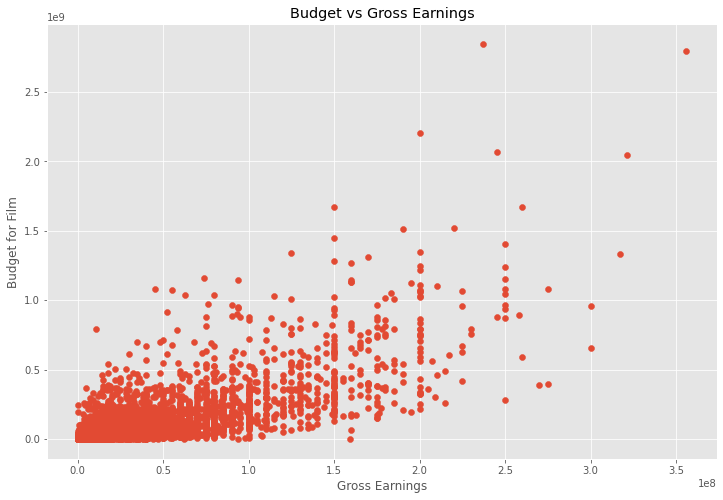

In [69]:
# Correlation 

# scatter plot with budget vs gross

plt.scatter(x=df1['budget'], y=df1['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

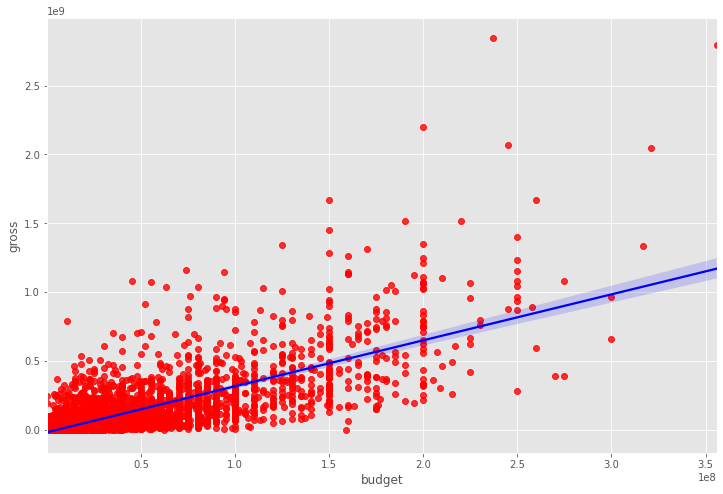

In [72]:
#Plot the budget vs gross using seaborn 

sns.regplot(x='budget',y='gross',data=df1, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [75]:
#looking at correlation 

# Different types of correlation  Pearson, kendall, spearman

df.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


In [77]:
# shows high correlation between budget and gross 


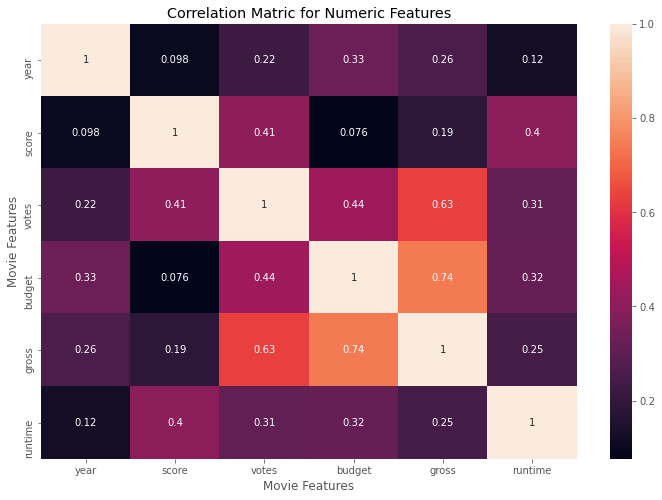

In [80]:
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [105]:
#company (changing values to numericals )

df_numerize = df1

for col_name in df_numerize.columns:
    if(df_numerize[col_name].dtype == 'object'):
        df_numerize[col_name]= df_numerize[col_name].astype('category')
        df_numerize[col_name]= df_numerize[col_name].cat.codes
        
df_numerize.head()        
        
        

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,386,5,0,2009,527,7.8,1100000.0,785,1263,1534,47,237000000,2.847246e+09,1382,162.0,169
7445,388,5,0,2019,137,8.4,903000.0,105,513,1470,47,356000000,2.797501e+09,983,181.0,648
3045,4909,5,6,1997,534,7.8,1100000.0,785,1263,1073,47,200000000,2.201647e+09,1382,194.0,181
6663,3643,5,0,2015,529,7.8,876000.0,768,1806,356,47,245000000,2.069522e+09,945,138.0,173
7244,389,5,0,2018,145,8.4,897000.0,105,513,1470,47,321000000,2.048360e+09,983,149.0,646


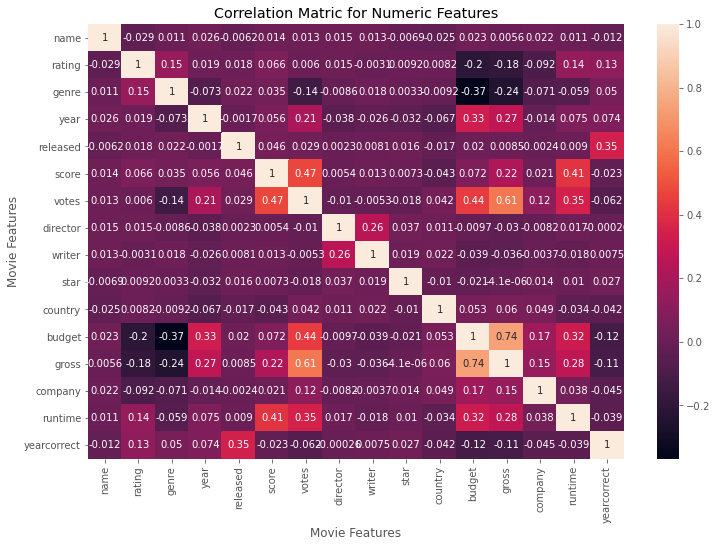

In [85]:
# Correlation among all features including numerized features.


correlation_matrix = df_numerize .corr(method='pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [86]:
df_numerize.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.029234,0.010996,0.025542,-0.006152,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850,-0.012389
rating,-0.029234,1.000000,0.147796,0.019499,0.018083,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792,0.125594
genre,0.010996,0.147796,1.000000,-0.073167,0.022142,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237,0.050167
year,0.025542,0.019499,-0.073167,1.000000,-0.001740,0.056386,0.206021,-0.038354,-0.025908,-0.032157,-0.066748,0.327722,0.274321,-0.014333,0.075077,0.074109
released,-0.006152,0.018083,0.022142,-0.001740,1.000000,0.045874,0.028833,0.002308,0.008072,0.015706,-0.017228,0.019952,0.008501,-0.002407,0.008975,0.346261
score,0.014450,0.065983,0.035106,0.056386,0.045874,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.072001,0.222556,0.020656,0.414068,-0.023288
votes,0.012615,0.006031,-0.135990,0.206021,0.028833,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.439675,0.614751,0.118470,0.352303,-0.062379
director,0.015246,0.014656,-0.008553,-0.038354,0.002308,0.005413,-0.010376,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.029560,-0.008223,0.017433,-0.000257
writer,0.012880,-0.003149,0.017578,-0.025908,0.008072,0.012843,-0.005316,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.035885,-0.003697,-0.017561,0.007502
star,-0.006882,0.009196,0.003341,-0.032157,0.015706,0.007296,-0.017638,0.036593,0.018520,1.000000,-0.009990,-0.021473,-0.000004,0.014082,0.010108,0.026634


In [107]:

correlation_mat = df_numerize.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs


name         name           1.000000
             rating        -0.029234
             genre          0.010996
             year           0.025542
             released      -0.006152
             score          0.014450
             votes          0.012615
             director       0.015246
             writer         0.012880
             star          -0.006882
             country       -0.025490
             budget         0.023392
             gross          0.005639
             company        0.021697
             runtime        0.010850
             yearcorrect   -0.012389
rating       name          -0.029234
             rating         1.000000
             genre          0.147796
             year           0.019499
             released       0.018083
             score          0.065983
             votes          0.006031
             director       0.014656
             writer        -0.003149
             star           0.009196
             country        0.008230
 

In [89]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs 


budget       genre         -0.368523
genre        budget        -0.368523
gross        genre         -0.244101
genre        gross         -0.244101
budget       rating        -0.203946
rating       budget        -0.203946
             gross         -0.181906
gross        rating        -0.181906
genre        votes         -0.135990
votes        genre         -0.135990
budget       yearcorrect   -0.118066
yearcorrect  budget        -0.118066
             gross         -0.112710
gross        yearcorrect   -0.112710
rating       company       -0.092357
company      rating        -0.092357
genre        year          -0.073167
year         genre         -0.073167
genre        company       -0.071334
company      genre         -0.071334
country      year          -0.066748
year         country       -0.066748
yearcorrect  votes         -0.062379
votes        yearcorrect   -0.062379
genre        runtime       -0.059237
runtime      genre         -0.059237
company      yearcorrect   -0.045396
y

In [94]:
high_corr = sorted_pairs [(sorted_pairs) > 0.5 ] 
high_corr

votes        gross          0.614751
gross        votes          0.614751
             budget         0.740247
budget       gross          0.740247
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [95]:
# Votes and budget are highly corelated 